# Feature vectorization and questions&answers

In [2]:
import numpy as np
import random

def generate_random_person():
    person = {}
    #hour = random.randint(21, 23)
    #minute = random.choice(["00", "15", "30", "45"])
    person["Uyku Saati"] = random.choice(["21:00", "21:15", "21:30", "21:45", "22:00", "22:15", "22:30", "22:45", "23:00", "23:15", "23:30", "23:45", "00:00", "00:15", "00:30", "00:45", "01:00", "01:15", "01:30", "01:45", "02:00", "02:15", "02:30", "02:45", "03:00", "03:15", "03:30", "03:45", "04:00", "04:15", "04:30", "04:45", "05:00"]) 
    # 33 numbers of different sleep time
    #person["Uyku Saati"] = f"{hour}:{minute}"
    person["Ortalama"] = round(random.uniform(1.0, 4.0), 2)
    person["Sigara Kullanımı"] = random.choice(["evet", "hayır"])
    person["Evcil Hayvan"] = random.choice(["evet", "hayır"])
    person["Lüks Önemi"] = random.randint(1, 10)
    person["Kira Süresi"] = random.randint(2, 20)
    person["Fiyat Aralığı"] = random.randint(1000, 5000)
    return person

def get_person_answers(person):
    answers = {}
    answers["Soru 1: Genelde kaçta uyursun?"] = person["Uyku Saati"]
    answers["Soru 2: Ortalaman kaç?"] = person["Ortalama"]
    answers["Soru 3: Sigara kullanıyor musun?"] = person["Sigara Kullanımı"]
    answers["Soru 4: Evcil hayvanın var mı?"] = person["Evcil Hayvan"]
    answers["Soru 5: Evinizin lüks olması ne kadar önemli?"] = person["Lüks Önemi"]
    answers["Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?"] = person["Kira Süresi"]
    answers["Soru 7: Fiyat aralığınız nedir?"] = person["Fiyat Aralığı"]
    return answers

###########################################
def create_feature_vector(answers): # creates feature vector from certain answer dictionary
    feature_vector = np.zeros(39) # comes from the questions 32 sleep
    # 1 gpa 1 smoking 1 pet 1 luxury 1 rent duration 1 price
    
    # Genelde kaçta uyursun?
    ''' wrong because minute information 
    sleep_time = answers["Soru 1: Genelde kaçta uyursun?"]
    index = int(sleep_time[:2]) - 21 #04.30
    feature_vector[index] = 1
    '''
    sleep_time = answers["Soru 1: Genelde kaçta uyursun?"]
    hour = int(sleep_time[:2])
    minute = int(sleep_time[3:])
    if "0" in str(hour) or len(str(hour)) == 1:
        hour += 24
    index = int((hour - 21) * 4 + minute / 15) #4 means 21 -- 22 difference it should jump to 4 index after
    feature_vector[index] = 1
    
    # Ortalaman kaç?
    average = answers["Soru 2: Ortalaman kaç?"]
    feature_vector[33] = average
    
    # Sigara kullanıyor musun?
    smoking = answers["Soru 3: Sigara kullanıyor musun?"]
    feature_vector[34] = 1 if smoking == "evet" else 0
    
    # Evcil hayvanın var mı?
    pet = answers["Soru 4: Evcil hayvanın var mı?"]
    feature_vector[35] = 1 if pet == "evet" else 0
    
    # Evinizin lüks olması ne kadar önemli?
    luxury = answers["Soru 5: Evinizin lüks olması ne kadar önemli?"]
    feature_vector[36] = luxury
    
    # Evi kaç aylığına kiralamak istiyorsunuz?
    lease_duration = answers["Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?"]
    feature_vector[37] = lease_duration
    
    # Fiyat aralığınız nedir?
    price_range = answers["Soru 7: Fiyat aralığınız nedir?"]
    feature_vector[38] = price_range
    
    return feature_vector

answers_list = [] # stores answers which all are dictionaries
# 1000 kişi için otomatik olarak cevaplar oluşturan kod
for _ in range(2000):
    person = generate_random_person()
    #hour = random.randint(0, 4)
    #minute = random.choice(["00", "15", "30", "45"])
    #person["Uyku Saati"] = f"{hour:02d}:{minute}"
    answers = get_person_answers(person)
    answers_list.append(answers)
    for question, answer in answers.items(): # This part just prints the questions and answers
        #print(question)
        #print("Cevap: ", answer)
        pass
    #print("==============================")

# So far we created 10000 person and their different personalities    

#print(answers_list)

# Örnek bir kişi için özellik vektörünü oluşturma
person = {
    "Soru 1: Genelde kaçta uyursun?": "21:00",
    "Soru 2: Ortalaman kaç?": 3.5,
    "Soru 3: Sigara kullanıyor musun?": "hayır",
    "Soru 4: Evcil hayvanın var mı?": "evet",
    "Soru 5: Evinizin lüks olması ne kadar önemli?": 8,
    "Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?": 12,
    "Soru 7: Fiyat aralığınız nedir?": 3000
}

# creating feature_vectors for which all of the answers

feature_vector_list = []
for answer in answers_list:
    feature_vector = create_feature_vector(answer)
    feature_vector = feature_vector.astype(int)
    feature_vector_list.append(feature_vector)
    #print("Özellik vektörü:", feature_vector)
#print(feature_vector_list)

'''
feature_vector -> [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    0    0    0    0    0    0
    0    0    0    0    2    1    1    8   12 2836]  -> first 32 hours // question2 // question3 // goes like this // ...
'''


'\nfeature_vector -> [   0    0    0    0    0    0    0    0    0    0    0    0    0    0\n    0    0    0    0    0    0    0    1    0    0    0    0    0    0\n    0    0    0    0    2    1    1    8   12 2836]  -> first 32 hours // question2 // question3 // goes like this // ...\n'

In [3]:
#answers_list

# Clustering classes according to questions&answers

In [4]:
from sklearn.cluster import KMeans

# importing data set
X = feature_vector_list

# K-means clustering
kmeans = KMeans(n_clusters=5) # we have 5 classes 
kmeans.fit(X)

# take the clusters
clusters = kmeans.labels_

# converting clusters to class labels
class_labels = {0: "Long Term", 1: "Short Term", 2: "Chill", 3: "Lux Care", 4: "High Mark"}
predicted_labels = [class_labels[cluster] for cluster in clusters]

In [5]:
#predicted_labels

# Trying other clustering algorithms

# AgglomerativeClustering

In [6]:
from sklearn.cluster import AgglomerativeClustering # Use this for now

# Veri setini yükleme
X = feature_vector_list

# Hiyerarşik Kümeleme modelini uygulama
clustering = AgglomerativeClustering(n_clusters=5)
clustering.fit(X)

# Küme etiketlerini al
cluster_labels = clustering.labels_

# Küme etiketlerini sınıf etiketlerine dönüştürme
class_labels = {0: "Long Term", 1: "Short Term", 2: "Chill", 3: "Lux Care", 4: "High Mark"}
predicted_labels = [class_labels[label] for label in cluster_labels]

In [7]:
cluster_labels

array([4, 3, 3, ..., 0, 3, 0], dtype=int64)

In [8]:
#predicted_labels

# GaussianMixture 

In [9]:
from sklearn.mixture import GaussianMixture

# Veri setini yükleme veya oluşturma
# X: Özellik vektörleri
X = feature_vector_list
# GMM modelini oluşturma
gmm = GaussianMixture(n_components=5)  # 5 küme oluşturmak için

# GMM modelini veriye uydurma
gmm.fit(X)

# Veri noktalarının kümelere atanması
labels = gmm.predict(X)
#labels
# Elde edilen küme etiketlerini kullanma
# İşlemler, küme analizi, görselleştirme vb.
class_labels = {0: "Long Term", 1: "Short Term", 2: "Chill", 3: "Lux Care", 4: "High Mark"}
predicted_labels = [class_labels[label] for label in labels]

In [10]:
labels

array([3, 2, 1, ..., 0, 2, 1], dtype=int64)

In [12]:
#predicted_labels

# Model SVC

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Veri setini hazırlama
X = feature_vector_list
y = clusters     # KMEANS --> y=clusters && AgglomerativeClustering --> y=cluster_labels && GaussianMixture --> y=labels

# Veri setini eğitim ve test seti olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sınıflandırma modelini seçme (örneğin, Support Vector Machine)
model = SVC()

# Modeli eğitme
model.fit(X_train, y_train)

# Modeli test verileriyle değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)



Model accuracy: 0.98


In [14]:
y

array([0, 3, 3, ..., 2, 3, 2])

In [15]:
unique_y = np.unique(y)
unique_y

array([0, 1, 2, 3, 4])

# Other Models

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Öznitelik vektörleri
X = feature_vector_list

# Sınıflandırmalar
y = clusters

# Karar ağacı modelini oluşturma
DecisionTree_model = DecisionTreeClassifier()

# Modeli eğitme
DecisionTree_model.fit(X, y)

# Eğitilmiş modelle tahmin yapma
predictions = DecisionTree_model.predict(X)


# Tahminleri görüntüleme
for i, prediction in enumerate(predictions):
    #print(f"Öznitelik vektörü {i+1}: {X[i]}")
    #print(f"Sınıflandırma tahmini: {prediction}")
    #print("==============================")
    pass


'''
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)
'''

'\ny_pred = model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Model accuracy:", accuracy)\n'

# Model predict

In [22]:
new_feature_predict_vector = np.array([ 0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    1,    4,   15, 2000])
new_feature_predict_vector = new_feature_predict_vector.astype(int).reshape(1,-1)

In [23]:
# Yeni feature vectorler için sınıf tahmini yapma
y_pred_new = model.predict(new_feature_predict_vector)
y_pred_new #4 HIGH MARK

array([2])

# Model deployment

In [112]:
import joblib

# Modeli kaydetme
joblib.dump(model, 'svc_model.pkl')


['svc_model.pkl']

In [113]:
# Modeli yükleme
model = joblib.load('svc_model.pkl')

# Yeni feature vectorler için sınıf tahmini yapma
y_pred = model.predict(new_feature_predict_vector)
y_pred

array([4])

# Data Visualization

In [206]:
from collections import Counter

liste = predicted_labels

tekrar_sayisi = Counter(liste)
class_counts = {label: 0 for label in class_labels.values()}
for deger, sayi in tekrar_sayisi.items():
    class_counts[deger] = sayi
class_cp

{'Long Term': 390,
 'Short Term': 396,
 'Chill': 420,
 'Lux Care': 398,
 'High Mark': 396}

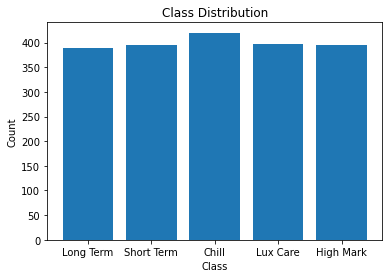

In [209]:
import matplotlib.pyplot as plt
from collections import Counter

class_labels = {
    1: "Long Term",
    2: "Short Term",
    3: "Chill",
    4: "Lux Care",
    5: "High Mark"
}
liste = predicted_labels
tekrar_sayisi = Counter(liste)
class_counts = {label: 0 for label in class_labels.values()}

for deger, sayi in tekrar_sayisi.items():
    class_counts[deger] = sayi
# Sınıf dağılımını bar grafik olarak çizin
plt.bar(class_names, class_counts.values())
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

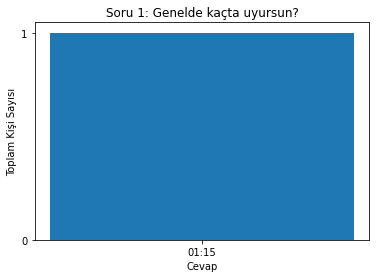

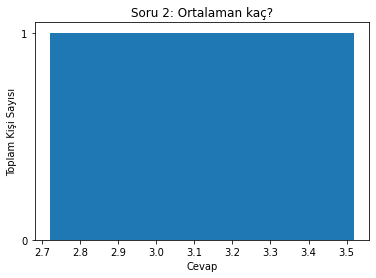

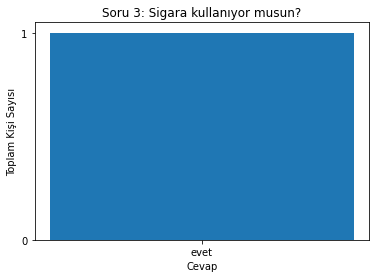

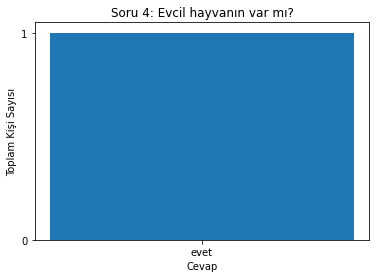

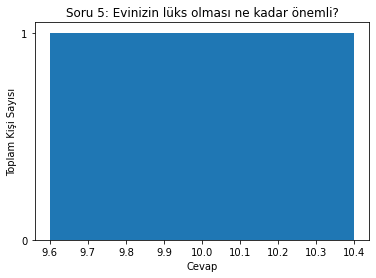

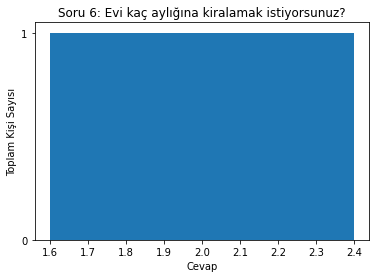

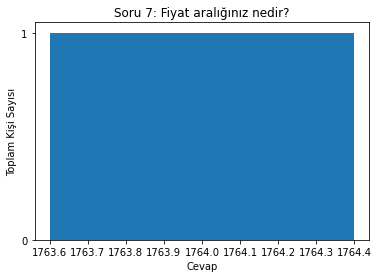

In [26]:
import matplotlib.pyplot as plt

# Sorular ve cevaplar
sorular = ["Soru 1: Genelde kaçta uyursun?",
           "Soru 2: Ortalaman kaç?",
           "Soru 3: Sigara kullanıyor musun?",
           "Soru 4: Evcil hayvanın var mı?",
           "Soru 5: Evinizin lüks olması ne kadar önemli?",
           "Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?",
           "Soru 7: Fiyat aralığınız nedir?"]

cevaplar = [("01:15", 3.12, "evet", "evet", 10, 2, 1764),
            # Diğer cevaplar buraya eklenebilir
            ]

# Grafik oluşturma
for i, soru in enumerate(sorular):
    cevap_listesi = [cevap[i] for cevap in cevaplar]
    unique_cevaplar = list(set(cevap_listesi))
    toplam_kisi_sayisi = [cevap_listesi.count(cevap) for cevap in unique_cevaplar]

    fig, ax = plt.subplots()
    ax.bar(unique_cevaplar, toplam_kisi_sayisi)
    ax.set_xlabel("Cevap")
    ax.set_ylabel("Toplam Kişi Sayısı")
    ax.set_title(soru)

    # Yükseklik değerlerini tam sayılara dönüştürme
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

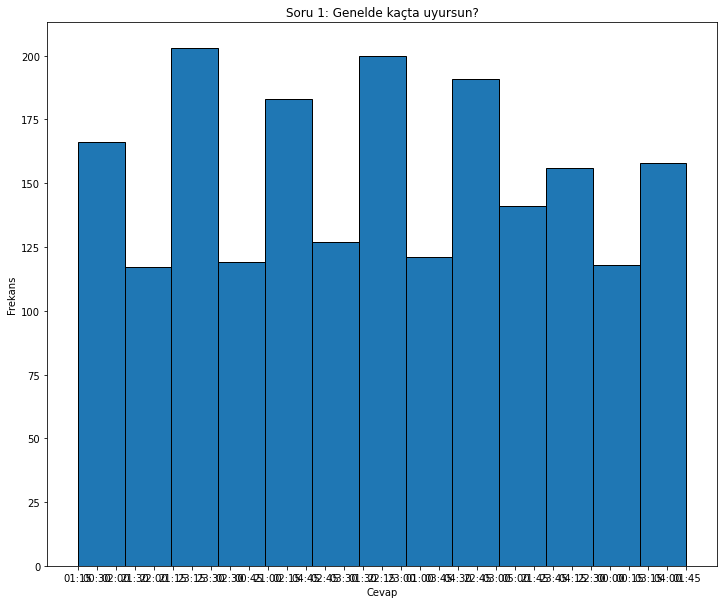

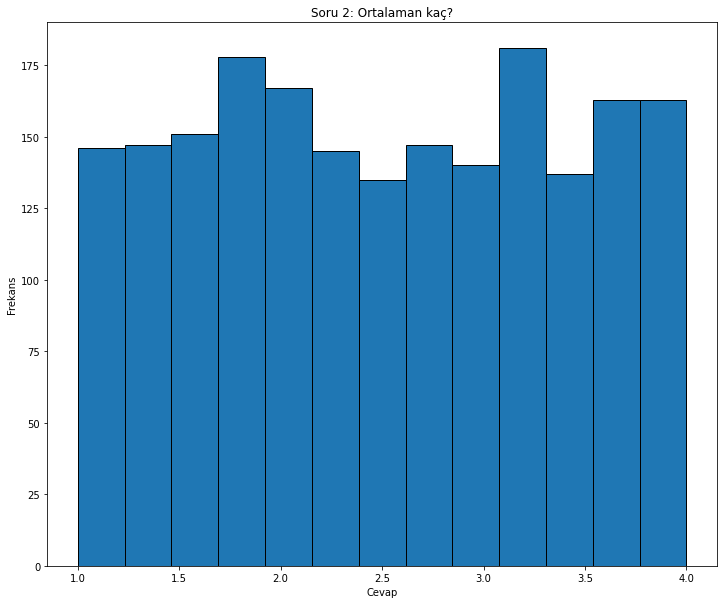

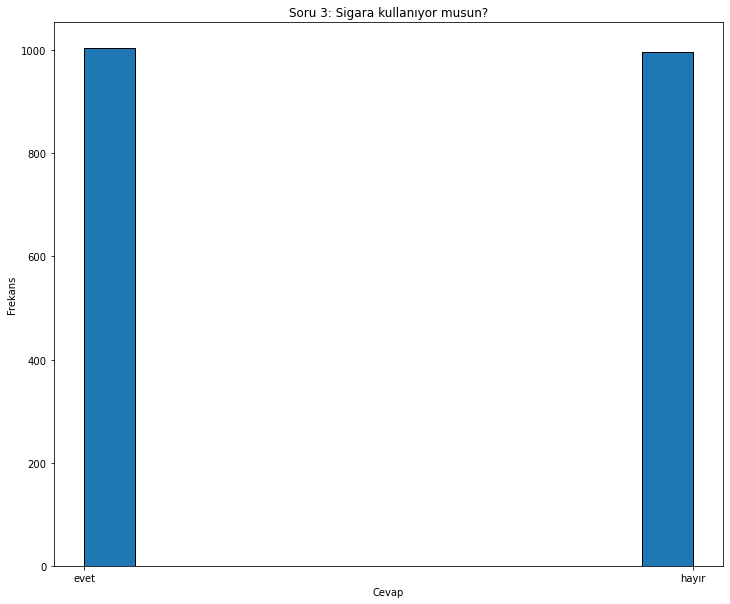

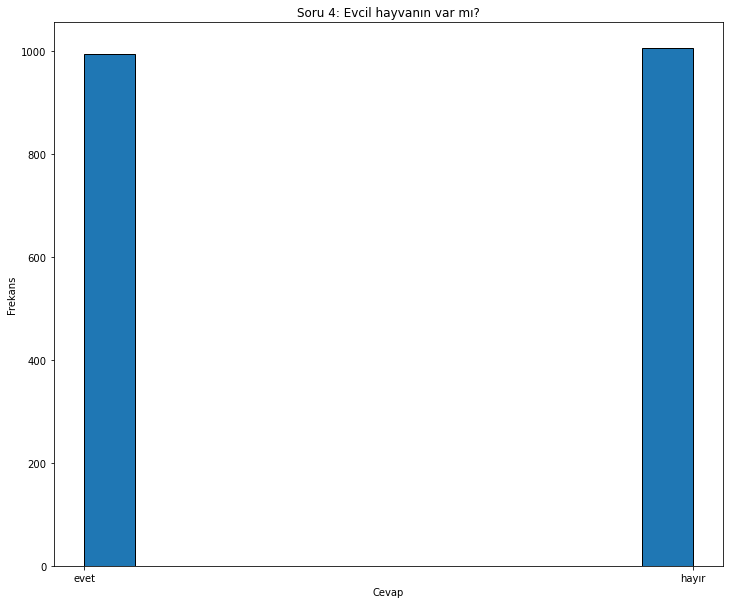

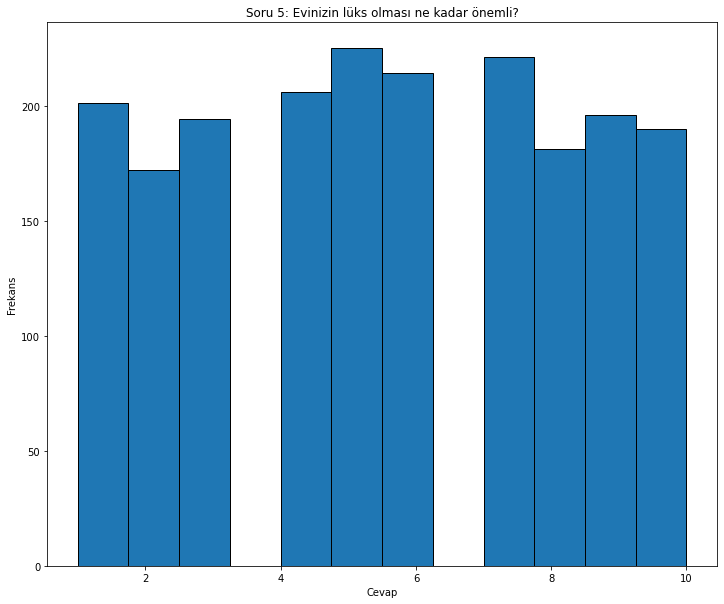

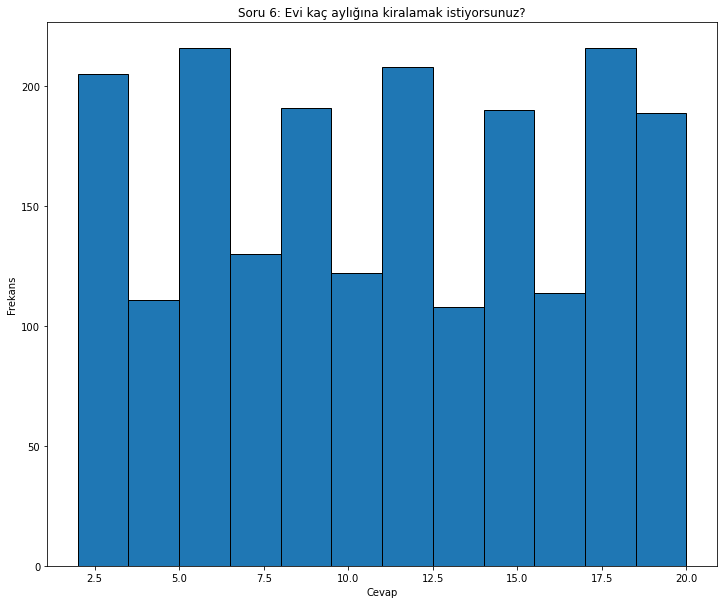

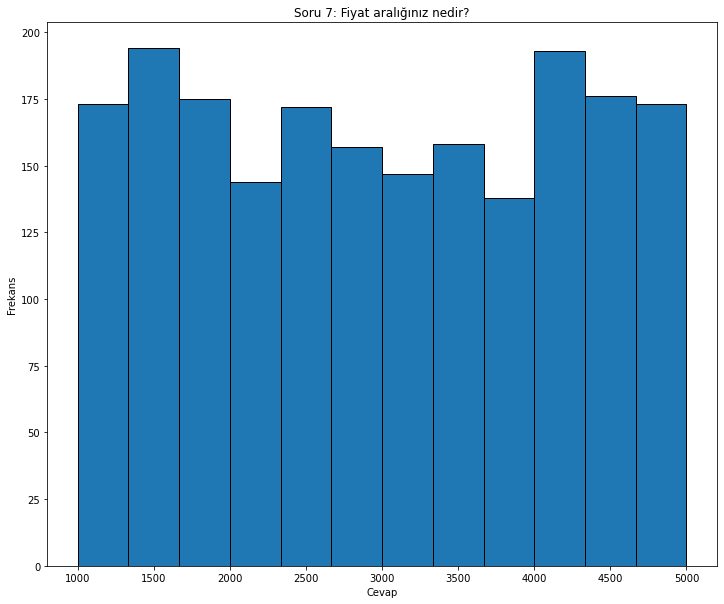

In [50]:
import matplotlib.pyplot as plt

# Sorular
sorular = ["Soru 1: Genelde kaçta uyursun?",
           "Soru 2: Ortalaman kaç?",
           "Soru 3: Sigara kullanıyor musun?",
           "Soru 4: Evcil hayvanın var mı?",
           "Soru 5: Evinizin lüks olması ne kadar önemli?",
           "Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?",
           "Soru 7: Fiyat aralığınız nedir?"]

# Cevaplar listesi
cevaplar = answers_list

# Her bir soru için ayrı bir histogram oluşturma
for i, soru in enumerate(sorular):
    cevap_listesi = [cevap[soru] for cevap in cevaplar if soru in cevap]

    # Histogram oluşturma
    plt.figure(figsize=(12, 10))  # Grafik boyutunu ayarla #18,16
    plt.hist(cevap_listesi, bins='auto', edgecolor='black')
    plt.xlabel("Cevap")
    plt.ylabel("Frekans")
    plt.title(soru)

    plt.show()

In [ ]:
short_feature_vector_list = feature_vector_list[:100]
short_predicted_labels = predicted_labels[:100]
for enum_num,feature_vector in enumerate(short_feature_vector_list):
    #np.insert(feature_vector,len(feature_vector),short_predicted_labels[enum_num])
    feature_vector = np.append(feature_vector,short_predicted_labels[enum_num]).astype('object')
    short_feature_vector_list[enum_num] = feature_vector


In [ ]:
short_feature_vector_list